## Student Performance - Regression Task


#### **Life cycle of Machine learning Project**

- Understanding the Problem Statement
- Data Collection
- Data Quality Check
- Exploratory Data Analysis
- Data Pre-Processing
- Model Training
- Hyperparam Tunning / Model Tunning

### 1) Problem statement
- This project aims to check if education performance is affected by other features (demographic ones inluded), and to create a regression model to predict the `math_score`. The project could be use for eduaction professionals, in order to see what students will have most difficult, and efficiently plan reforce classes.

### 2) Data Collection
- [Dataset Source](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977)


### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
# Changing the current working directory to the root of the project
import os
os.chdir("../")
os.getcwd()

'c:\\Users\\Marina\\Desktop\\cicd-project'

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from ydata_profiling import ProfileReport
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pathlib import Path

#### Import the CSV Data as Pandas DataFrame

In [3]:
raw_data_path = os.path.join("raw_data", "students.csv")

df_raw = pd.read_csv(raw_data_path)

#### Use Y-data-Profilling - to get a detailed EDA about some distributions and data quality aspects

In [ ]:
raw_data_path_profiling = os.path.join("mvp-notebook", "mvp-artifacts", "df_raw_profiling.html")

# Generate the profile report
profile = ProfileReport(df_raw, title="Data Profiling Report", explorative=True)

# Save the profile report to the specified path
profile.to_file(raw_data_path_profiling)

print(f"Profile saved to {raw_data_path_profiling}")


Export report to file: 100%|██████████| 1/1 [00:00<00:00, 71.41it/s]

Profile saved to mvp-notebook\mvp-artifacts\df_raw_profiling.html


#### Profilling Analysis:

**Data Quality Check**

* There are no missing values;
* There are no features with low variance; and
* There are no strange values (out of scale or strange categories); 
* There are no Duplicate rows; and
* There are no imbalancament, that could invalidate our data for our purporses.

**Overall Stats**

* There are 8 features; and
* There are 1,000 samples.
* There are 3 numerical features and 5 categoricals ones

**Insights**

* All the numeric features resembles gaussian distributions; 
* The `writting_score` and `reading_score`, are both correlated with our `target_feature: math_score`, and between each other. (In the future, we can try to some feature engineering by excluding one of them of the dataframe, because they are correlated with each other);
* The `writting_score` and `reading_score` tends to be the best features for our model; and
* This is the correlation plot between our `reading_score` and `math_score`, it resembles a linear correlation:

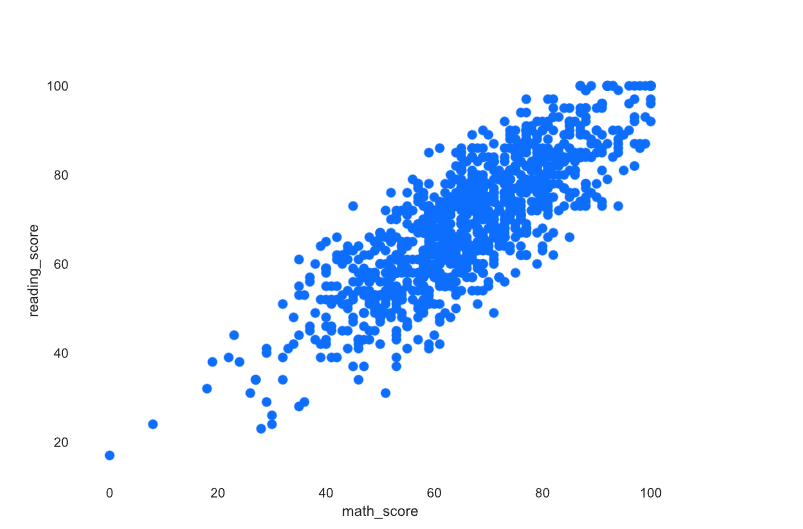

**Disclaimer: Some cultures could be sensitive about the terminology of the feature `race_ethnicity`, so make sure to change its name according to the culture you are dealing with**

In [6]:
# According to the y_data_profilling this is the cateogrization of our features:

NUMERIC_Y_TARGET = "math_score"

NUMERIC_SCALARS = ["reading_score", "writing_score"]

CATEGORICAL_NOMINALS = ["gender", "race_ethnicity", "lunch", "test_preparation_course"]

CATEGORICAL_ORDINALS = ["parental_level_of_education"]

#### Dataset Feature Description
* gender: Gender of the students (Male/Female);
* race_ethnicity: Ethnicity of the students (Group A, B, C, D, E);
* parental_level_of_education: Highest level of education attained by the parents (Bachelor's Degree, Some College, Master's Degree, Associate's Degree, High School);
* lunch: Type of lunch the student receives before the test (Standard or Free/Reduced);
* test_preparation_course: Whether the student completed a test preparation course before the exam (Completed or Not Completed);
* math_score: Score obtained by the student in the math;
* reading_score: Score obtained by the student in the reading; and
* writing_score: Score obtained by the student in the writing

#### Additional Checks:

In [ ]:
# Code to Return Additional information about the DataFrame
print(f"{'*' * 10}DTypes:{'*' * 10}")
df_raw.info()

print(f"\n\n{'*' * 10}Number of Unique Values:{'*' * 10}")
print(df_raw.nunique())

print(f"\n\n{'*' * 10}Statistics of the numeric Values:{'*' * 10}")
print(df_raw.describe())

print(f"\n\n{'*' * 10}Sample:{'*' * 10}")
print(df_raw.head())

for feature in (CATEGORICAL_NOMINALS + CATEGORICAL_ORDINALS):

    print(f"Categories in {feature} variable:     ",end=" " )
    print(df_raw[feature].unique())



**********DTypes:**********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**********Number of Unique Values:**********
gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                   

In [ ]:
# Checking the number of students that got full marks:

for feature in (NUMERIC_SCALARS + [NUMERIC_Y_TARGET]):
    number_of_students_with_full_marks = df_raw[df_raw[feature] == 100].shape[0]
    print(f"Number of students with full marks in {feature}: {number_of_students_with_full_marks}")

Number of students with full marks in reading_score: 17
Number of students with full marks in writing_score: 14
Number of students with full marks in math_score: 7


In [ ]:
# Checking the number of students with less than or equal to 20 marks:
for feature in (NUMERIC_SCALARS + [NUMERIC_Y_TARGET]):
    number_of_students_less_than_20 = df_raw[df_raw[feature] <= 20].shape[0]
    print(f"Number of students with less than or equal to 20 marks in {feature}: {number_of_students_less_than_20}")

Number of students with less than or equal to 20 marks in reading_score: 1
Number of students with less than or equal to 20 marks in writing_score: 3
Number of students with less than or equal to 20 marks in math_score: 4


#### Insights:

* Although the minimum score for math is 0, the minimum for writing is higher at 10, and the minimum for reading is even higher at 17.
* The means for all subjects are quite similar, ranging from 66.08900 to 68.054000.
* The standard deviations are also closely aligned, varying between 14.600192 and 15.195657
*  Students have performed the worst in `maths` 
*  Best performance is in `reading`


### Feature Engineering

This is a simple dataset, so we can use the very simple features aggretations techniques, however for complex datasets, we could use libraries like `feature tools`, that perform a DFS (Deep Feature Synthesys), to create our features automatically (also supporting relational datasets); and after that, perform some feature filtering algorithm (Multual information as an example.) 

#### Adding columns for "Total Score" and "Average"

In [26]:
df_raw['total score'] = df_raw['math_score'] + df_raw['reading_score'] + df_raw['writing_score']
df_raw['average'] = df_raw['total score']/3
df = df_raw

### 4. Exploring Data ( Visualization )

In [28]:
# Exporting the data to use in PowerBi
df_xlsx_path = os.path.join("mvp-notebook", "mvp-artifacts", "dataframe.xlsx")

df.to_excel(df_xlsx_path)

[PowerBi Data Visualizations](https://app.powerbi.com/groups/me/reports/718517ef-2666-484b-b6c3-556a69f242c5/ReportSection?experience=power-bi)

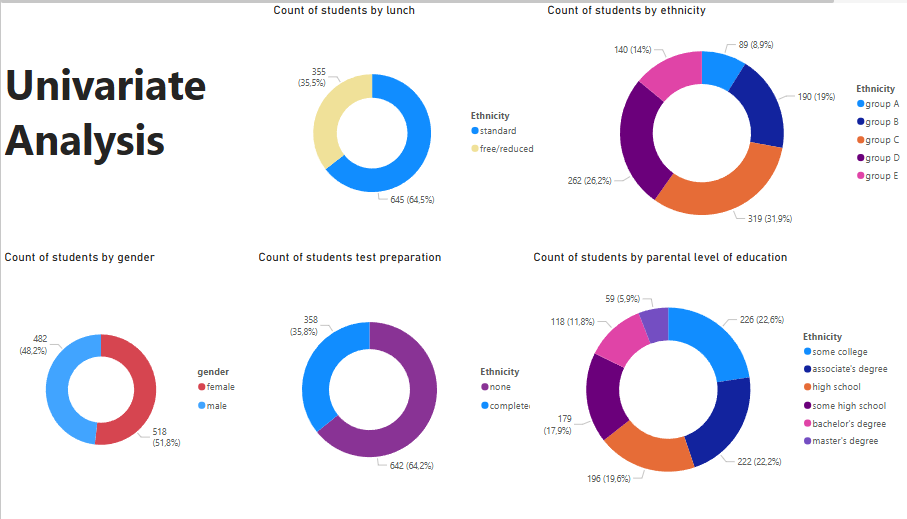

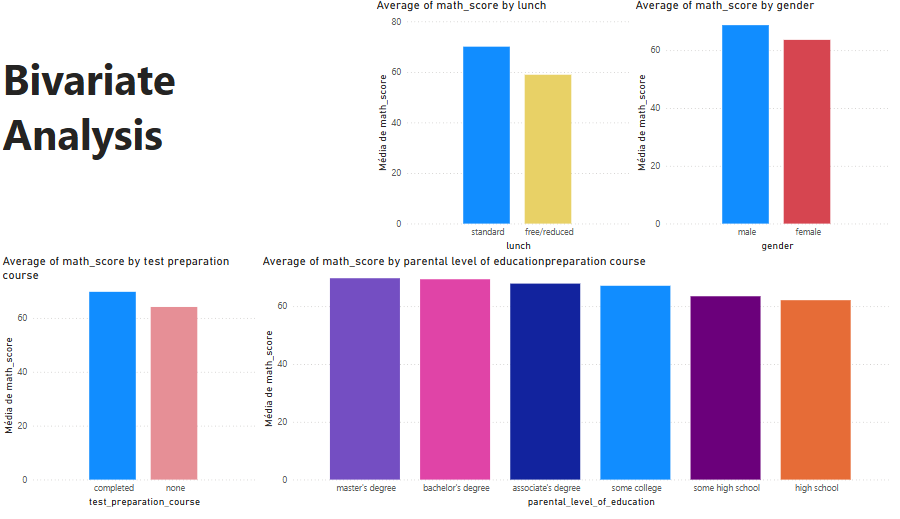

#### Insights:

##### Univariate Analysys:

* Males tend to perform better in math, in avarage, than females

##### Bivariate Analysys:

* `Lunch` seems to have a signigicant impact in the `avarage_math_score`

* Children of more `More gratued` parents tend to have a better performance, but not significantly higher.

#### Exploration of the Score Average

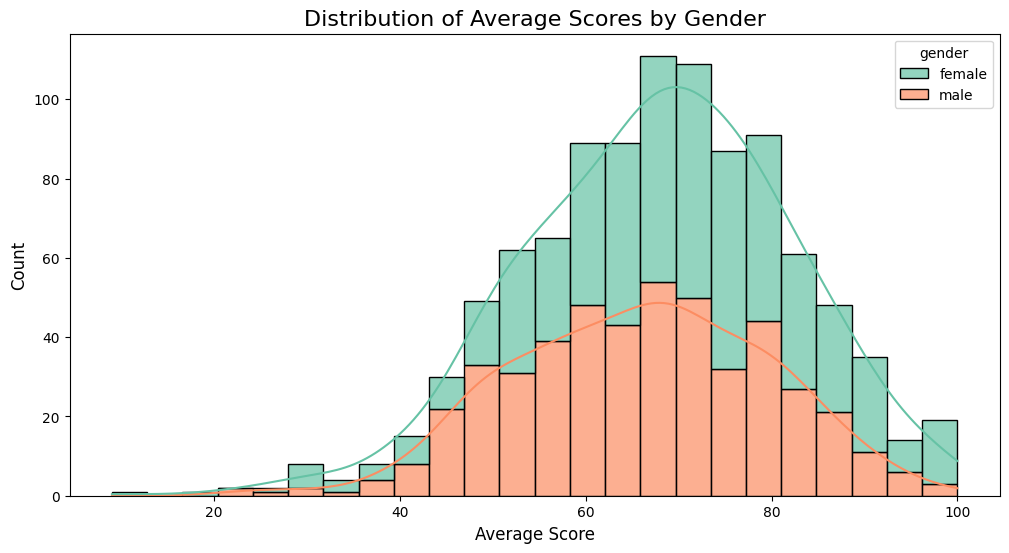

In [38]:
plt.figure(figsize=(12, 6))

sns.histplot(
    data=df, 
    x='average', 
    kde=True, 
    hue='gender', 
    palette='Set2',  # Use a distinct color palette
    multiple='stack',  # Stack bars by gender for better comparison
    alpha=0.7  # Adjust transparency for better clarity
)

plt.title("Distribution of Average Scores by Gender", fontsize=16)
plt.xlabel("Average Score", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Display the plot
plt.show()


#####  Insights

* Female students tend to perform well then male students in the avarage of three subjects, but worst in math

#### PairPlot

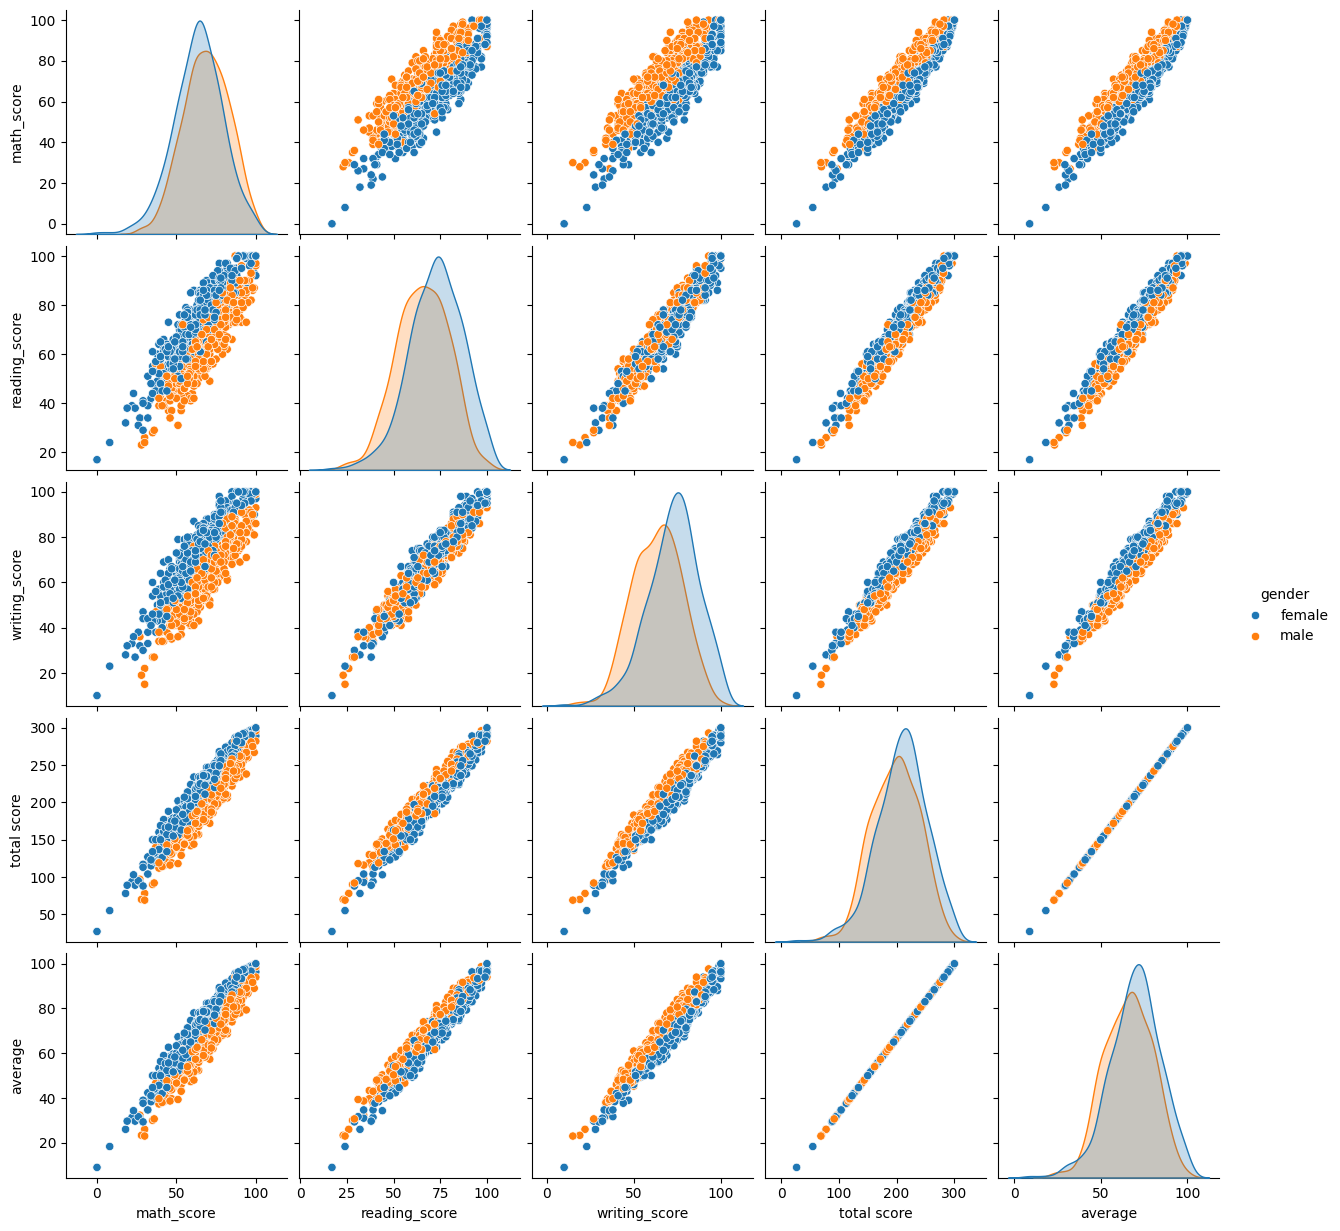

In [34]:
sns.pairplot(df,hue = 'gender')
plt.show()

##### Insights
* Confirmation of the high correlation between the scores
* Females have a lower mean in math, but all the best grades, in every subject, are from females.
* Males look to have a lower variance in every subject.

### Conclusions

* Student performance is influenced by lunch type, race, and parental education level.
* Females outperform in pass rates and dominate as top scorers.
* The impact of the test preparation course on performance appears minimal.

### Pre-processing steps:
*  Enconde the `CATEGORICAL_NOMINALS`, using dummy-enconding, or one-hot-encoding
*  Use a ordinal encoder to `CATEGORICAL_ORDINALS`,
*  The `average` feature, was just created to understand the dataset, it will not be passed to the training process because of multicolinearity.
*  The numeric features are already in the same scale

## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [3]:
import os
import pandas as pd
import numpy as np
import catboost
import xgboost

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [4]:
import os
raw_data_path = os.path.join("raw_data", "students.csv")

df_raw = pd.read_csv(raw_data_path)

In [5]:
df_raw.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [7]:
X, y = df_raw.drop(columns=[NUMERIC_Y_TARGET], axis = 1), df_raw[NUMERIC_Y_TARGET]

In [9]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [10]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

#### Train Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

##### Checking the shapes:

In [12]:
shape_checking_dict = {"X_train": X_train,
                        "X_test": X_test,
                        "y_train": y_train,
                        "y_test": y_test,}


for key,value in shape_checking_dict.items():
    print(f"{key}shape:")
    print(f"{value.shape}")


X_trainshape:
(800, 7)
X_testshape:
(200, 7)
y_trainshape:
(800,)
y_testshape:
(200,)


### Preprocessing pipeline creation

In [13]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline

# Define your transformers
categorical_nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))  # drop='first' to avoid multicollinearity
])

categorical_ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree"]]))
])

# Custom transformer to convert the output to a pandas DataFrame
def to_dataframe(X, columns):
    return pd.DataFrame(X, columns=columns)

# Define the column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat_nom', categorical_nominal_transformer, CATEGORICAL_NOMINALS),
        ('cat_ord', categorical_ordinal_transformer, CATEGORICAL_ORDINALS),
        ('num', FunctionTransformer(), NUMERIC_SCALARS)  # Keep numeric features unchanged, they are with the same scale
    ])

# Apply the transformation to the data
trained_preprocessor = preprocessor.fit(X_train)
X_train_transformed = trained_preprocessor.transform(X_train)

# Get the column names for the final DataFrame
# For categorical_nominal_transformer, the output will have one-hot encoded columns
cat_nom_columns = preprocessor.transformers_[0][1].named_steps['onehot'].get_feature_names_out(CATEGORICAL_NOMINALS)
cat_ord_columns = CATEGORICAL_ORDINALS  # Since it's ordinal, it should stay the same
num_columns = NUMERIC_SCALARS  # Numeric columns stay as they are

# Combine all columns
final_columns = list(cat_nom_columns) + list(cat_ord_columns) + list(num_columns)

# Convert the transformed data to a DataFrame
X_train_transformed_df = to_dataframe(X_train_transformed, final_columns)


Our pipeline does not use global statistics(does not leak data), so we can pass the transformed data, directly to the training loop.

In [14]:
# Checking the transformation
X_train_transformed_df.head()

,gender_male,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,lunch_standard,test_preparation_course_none,parental_level_of_education,reading_score,writing_score
0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,5.0,70.0,75.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,83.0,83.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,89.0,86.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,67.0,66.0
4,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,64.0,57.0


In [15]:
X_test_transformed = trained_preprocessor.transform(X_test)

#### Train using Cross-Validation

[prompt](https://chatgpt.com/c/6740ed55-47a4-8001-b596-12b98f38bdfd)

In [16]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

models_with_hyperparameters = [
    (LinearRegression(), {'fit_intercept': [True, False]}),
    
    (Lasso(random_state=42), {'alpha': [0.1, 1, 10], 'fit_intercept': [True, False]}),
    
    (Ridge(random_state=42), {'alpha': [0.1, 1, 10], 'fit_intercept': [True, False]}),
    
    (KNeighborsRegressor(), {'n_neighbors': [3, 5, 7, 10], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}),
    
    (DecisionTreeRegressor(random_state=42), {'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 5]}),
    
    (RandomForestRegressor(random_state=42), {'n_estimators': [50, 100], 'max_depth': [None, 10], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 5]}),
    
    (XGBRegressor(random_state=42), {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5, 7], 'subsample': [0.8, 1.0]}),
    
    (CatBoostRegressor(random_state=42, verbose=False), {'iterations': [500, 1000], 'depth': [3, 5, 7], 'learning_rate': [0.01, 0.1], 'l2_leaf_reg': [1, 3, 5]}),
    
    (AdaBoostRegressor(random_state=42), {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 0.5]})
]


### Train and Hyperparam Tuning using CrossValidation Kfold

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def get_scorer(scoring_criteria):
    """Define scoring metrics for GridSearchCV."""
    scoring_dict = {
        'r2_score': 'r2',
        'mae': 'neg_mean_absolute_error',
        'rmse': 'neg_root_mean_squared_error',
        'mse': 'neg_mean_squared_error'
    }
    if scoring_criteria not in scoring_dict:
        raise ValueError("scoring_criteria must be one of ['r2_score', 'mae', 'rmse', 'mse']")
    return scoring_dict[scoring_criteria]

def get_metric_func(scoring_criteria):
    """Get the metric function for final evaluation."""
    metrics_dict = {
        'r2_score': r2_score,
        'mae': mean_absolute_error,
        'rmse': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
        'mse': mean_squared_error
    }
    return metrics_dict[scoring_criteria]

def train_and_evaluate_models(X_train_transformed, X_test_transformed, y_train, y_test, 
                   models_with_hyperparameters, k=5, scoring_criteria='r2_score', 
                   random_state=42):
    """
    Evaluate multiple models using k-fold cross-validation with pre-transformed data.
    
    Parameters:
    -----------
    X_train_transformed : array-like
        Pre-transformed training features
    X_test_transformed : array-like
        Pre-transformed test features
    y_train : array-like
        Training target
    y_test : array-like
        Test target
    models_with_hyperparameters : list of tuples
        List of (model, hyperparameters dict) pairs
    k : int, default=5
        Number of folds for cross-validation
    scoring_criteria : str, default='r2_score'
        Metric to choose best model ('r2_score', 'mae', 'rmse', 'mse')
    random_state : int, default=42
        Random state for reproducibility
    
    Returns:
    --------
    best_models : list
        List of best fitted model instances for each model type
    results_df : pandas.DataFrame
        DataFrame with model performance metrics
    best_model_overall : sklearn.base.BaseEstimator
        Best performing model
    """
    # Initialize variables
    best_models = []
    results = []
    
    # Set up cross-validation
    kf = KFold(n_splits=k, shuffle=True, random_state=random_state)
    
    # Get appropriate scorer for GridSearchCV
    scorer = get_scorer(scoring_criteria)
    metric_func = get_metric_func(scoring_criteria)
    
    for model, hyperparameters in models_with_hyperparameters:
        print(f"Evaluating {model.__class__.__name__}...")
        
        # Add random_state if applicable
        if hasattr(model, 'random_state'):
            hyperparameters['random_state'] = [random_state]
        
        # Perform Grid Search with cross-validation
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=hyperparameters,
            cv=kf,
            n_jobs=-1,
            scoring=scorer,
            error_score='raise'
        )
        
        # Fit the grid search
        grid_search.fit(X_train_transformed, y_train)
        
        # Get best model
        best_model = grid_search.best_estimator_
        
        # Make predictions
        y_pred = best_model.predict(X_test_transformed)
        
        # Calculate metrics
        performance = {
            'Model': model.__class__.__name__,
            'Best Hyperparameters': grid_search.best_params_,
            'R2 Score': r2_score(y_test, y_pred),
            'MAE': mean_absolute_error(y_test, y_pred),
            'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
            'MSE': mean_squared_error(y_test, y_pred),
            'CV Score': -grid_search.best_score_ if 'neg_' in scorer else grid_search.best_score_
        }
        
        results.append(performance)
        best_models.append(best_model)
    
    # Create results DataFrame
    results_df = pd.DataFrame(results)
    
    # Sort results based on scoring criteria
    if scoring_criteria == 'r2_score':
        results_df = results_df.sort_values(by='R2 Score', ascending=False)
    else:
        metric_name = scoring_criteria.upper()
        results_df = results_df.sort_values(by=metric_name, ascending=True)
    
    # Get best overall model
    best_model_idx = results_df.index[0]
    best_model_overall = best_models[best_model_idx]
    
    print("Evaluation Complete.")
    
    return best_models, results_df, best_model_overall

# Example usage:
"""
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

# First, preprocess your data
preprocessor = StandardScaler()
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Define models and their hyperparameters
models_with_hyperparameters = [
    (LinearRegression(), {}),
    (RandomForestRegressor(), {
        'n_estimators': [100, 200],
        'max_depth': [10, 20]
    }),
    (DecisionTreeRegressor(), {
        'max_depth': [5, 10, 15]
    })
]

# Evaluate models with pre-transformed data
best_models, results_df, best_model_overall = evaluate_models(
    X_train_transformed, 
    X_test_transformed, 
    y_train, 
    y_test,
    models_with_hyperparameters,
    scoring_criteria='r2_score'
)

"""

"\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.tree import DecisionTreeRegressor\nfrom sklearn.preprocessing import StandardScaler\n\n# First, preprocess your data\npreprocessor = StandardScaler()\nX_train_transformed = preprocessor.fit_transform(X_train)\nX_test_transformed = preprocessor.transform(X_test)\n\n# Define models and their hyperparameters\nmodels_with_hyperparameters = [\n    (LinearRegression(), {}),\n    (RandomForestRegressor(), {\n        'n_estimators': [100, 200],\n        'max_depth': [10, 20]\n    }),\n    (DecisionTreeRegressor(), {\n        'max_depth': [5, 10, 15]\n    })\n]\n\n# Evaluate models with pre-transformed data\nbest_models, results_df, best_model_overall = evaluate_models(\n    X_train_transformed, \n    X_test_transformed, \n    y_train, \n    y_test,\n    models_with_hyperparameters,\n    scoring_criteria='r2_score'\n)\n\n# Make predictions with best model (using transformed dat

Looking at your code from a model evaluation and tuning perspective:

1. Good practices you're already following:
- Using K-fold CV for hyperparameter tuning
- Using a separate test set for final evaluation
- Using GridSearchCV with proper scoring metrics
- Not using the test set during the hyperparameter tuning process

2. Important points about your approach:
- The hyperparameters are tuned using K-fold CV on the training set only
- The test set is only used once at the end to compute the final metrics
- There's no data leakage between training and test sets
- The preprocessing is done outside the function (good when preprocessing parameters are learned from data)

This is considered good practice because:
- You're not using the test set information during model selection or tuning
- The final test metrics give you an unbiased estimate of model performance
- Each model's hyperparameters are optimized independently using CV
- The cross-validation scores help you understand model stability

be to perhaps add a nested cross-validation if you want to get a more unbiased estimate of the generalization performance, but that's often overkill for practical applications and your current approach is perfectly valid.

So yes, your code follows good practices for model evaluation and hyperparameter tuning:
1. ✓ Proper separation of training and test data
2. ✓ Hyperparameter tuning using K-fold CV on training data only
3. ✓ Test set used only for final evaluation
4. ✓ No data leakage between train and test sets
5. ✓ Preprocessing done independently of the model selection process

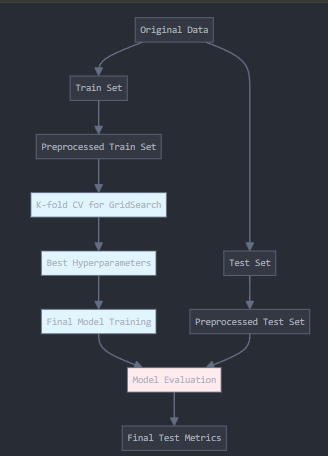

In [20]:
best_models, results_df, best_model_overall = train_and_evaluate_models(X_train_transformed, X_test_transformed, y_train, y_test, models_with_hyperparameters, k=5, scoring_criteria='r2_score')

Evaluating LinearRegression...
Evaluating Lasso...
Evaluating Ridge...
Evaluating KNeighborsRegressor...
Evaluating DecisionTreeRegressor...
Evaluating RandomForestRegressor...
Evaluating XGBRegressor...
Evaluating CatBoostRegressor...
Evaluating AdaBoostRegressor...
Evaluation Complete.


In [21]:
model_training_artifacts_path = os.path.join("mvp-notebook", "mvp-artifacts", "model_training")

results_df.to_excel(os.path.join(model_training_artifacts_path, "results.xlsx"))

In [24]:
import joblib
from joblib import dump
for model in best_models:
    filename = f"{model.__class__.__name__}.joblib"
    model_path = os.path.join(model_training_artifacts_path, filename)
    joblib.dump(model, model_path)


In [26]:
filename = "trained_preprocessor.joblib"
model_path = os.path.join(model_training_artifacts_path, filename)
joblib.dump(trained_preprocessor, model_path)

['mvp-notebook\\mvp-artifacts\\model_training\\trained_preprocessor.joblib']

In [27]:
filename = "best_model.joblib"
model_path = os.path.join(model_training_artifacts_path, filename)
joblib.dump(best_model_overall, model_path)

['mvp-notebook\\mvp-artifacts\\model_training\\best_model.joblib']

## Results

In [29]:
filename = "best_model.joblib"
best_model_path = os.path.join(model_training_artifacts_path, filename)
from joblib import load

lasso_model = joblib.load(best_model_path)
y_pred = lasso_model.predict(X_test_transformed)
score = r2_score(y_test, y_pred)*100
print(" R2_score is %.2f" %score)

 R2_score is 88.31


## Visualize the Predictions

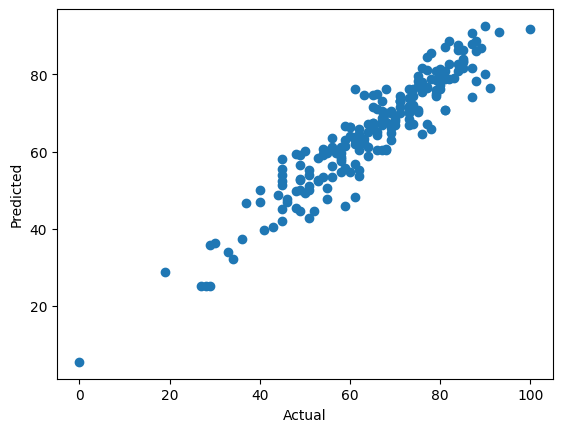

In [31]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

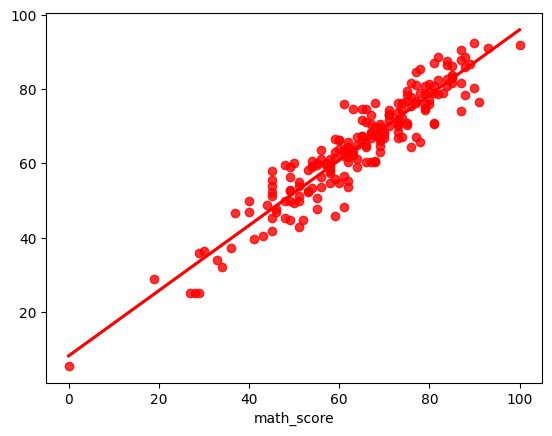

In [33]:
import seaborn as sns
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');